# Web Scraping and NLP Analysis of a Project Gutenberg eBook

## Overview
This project demonstrates an end-to-end Python workflow for **web scraping and natural language processing (NLP)** applied to a **public-domain eBook from Project Gutenberg**. Using open-source tools, the project extracts bibliographic metadata and performs exploratory text analysis on the first chapter of the book, including word frequency analysis, sentiment analysis, and visualization.

The project highlights how computational text analysis techniques can be applied in **digital humanities, library analytics, educational research, and applied NLP workflows**.

---

## Data Source
- **Project Gutenberg** (public-domain content)  
- eBook analyzed: [*Artificial Light: Its Influence upon Civilization*](https://www.gutenberg.org/cache/epub/17625/pg17625-images.html)

---

## Workflow (End-to-End Pipeline)
1. Scrape an HTML-formatted eBook from Project Gutenberg  
2. Extract bibliographic metadata (Title, Author, Release Date, Language)  
3. Identify and extract Chapter I using Roman numeral detection  
4. Tokenize chapter text using NLTK  
5. Remove English stopwords  
6. Generate word frequency distributions and plots  
7. Apply lemmatization to normalize word forms  
8. Perform sentiment analysis on the chapter text  
9. Visualize results using frequency plots and a word cloud  

  

In [1]:
# Import packages and libraries
import matplotlib.pyplot as plt
import requests
import re

import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import textblob
from textblob import TextBlob

from bs4 import BeautifulSoup
from wordcloud import WordCloud
from IPython.display import display, HTML


In [1]:
# nltk.download('stopwords')

In [ ]:
# nltk.download('wordnet')

In [17]:
# nltk.download('punkt_tab')

In [2]:
# Get url of The Project Gutenberg eBook of Artificial Light: Its Influence upon Civilization
url = 'https://www.gutenberg.org/cache/epub/17625/pg17625-images.html'

In [3]:
def scrape_gutenberg_first_chapter(url):
    """
    Scrapes Project Gutenberg metadata and extracts the first chapter text from a book URL.
    """
    r = requests.get(url)
    soup = BeautifulSoup(r.text, "html.parser")
    text = soup.get_text()

    lines = text.splitlines()

    # --- Metadata ---
    title = author = release_date = language = None

    for line in lines:
        line = line.strip()
        if line.startswith("Title:"):
            title = line.replace("Title:", "").strip()
        elif line.startswith("Author:"):
            author = line.replace("Author:", "").strip()
        elif line.startswith("Release date:"):
            release_date = line.replace("Release date:", "").strip()
        elif line.startswith("Language:"):
            language = line.replace("Language:", "").strip()
        elif "*** START" in line:
            break

    # --- Book body ---
    start_idx = next(i for i, l in enumerate(lines) if "*** START" in l)
    body = lines[start_idx:]

    # --- Only First chapter extraction (Roman numerals I, II) ---
    chapter_lines = []
    in_chapter = False

    for line in body:
        stripped = line.strip()

        # Start at Chapter I
        if re.match(r'^CHAPTER\s+I\b|^I$', stripped):
            in_chapter = True
            continue

        # Stop at Chapter II
        if re.match(r'^CHAPTER\s+II\b|^II$', stripped) and in_chapter:
            break

        if in_chapter:
            chapter_lines.append(line)


    first_chapter = "\n".join(chapter_lines)

    return {
        "title": title,
        "author": author,
        "release_date": release_date,
        "language": language,
        "first_chapter": first_chapter
    }

data = scrape_gutenberg_first_chapter(url)

In [4]:
def print_metadata(key, value):
    """
    Displays a styled metadata key-value pair as HTML output.
    """
    display(HTML(f"<b><span style='color:#006400;'>{key}</span></b> {value}"))

print_metadata("Title:", data["title"])
print_metadata("Author:", data["author"])
print_metadata("Release Date:", data["release_date"])
print_metadata("Language:", data["language"])

In [5]:
def nltk_process(text):
    """
    Tokenizes text, removes English stopwords, and filters short tokens using NLTK.
    """
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text.lower())

    sw = set(stopwords.words('english'))

    words_clean = [
        word for word in tokens
        if word not in sw and len(word) > 2
    ]

    return words_clean


In [6]:
def plot_word_freq(words, n=20):
    """
    Plots the top N most frequent words using NLTK's frequency distribution.
    """
    freqdist = nltk.FreqDist(words)
    plt.figure(figsize=(10, 5))
    freqdist.plot(n, color='purple', title="Word Frequency Count")
    plt.show()

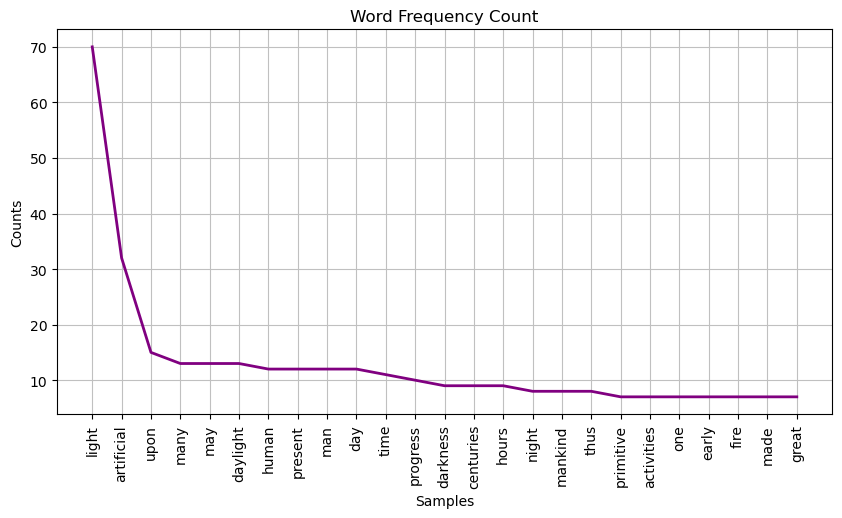

In [7]:

words = nltk_process(data["first_chapter"])
plot_word_freq(words, 25)


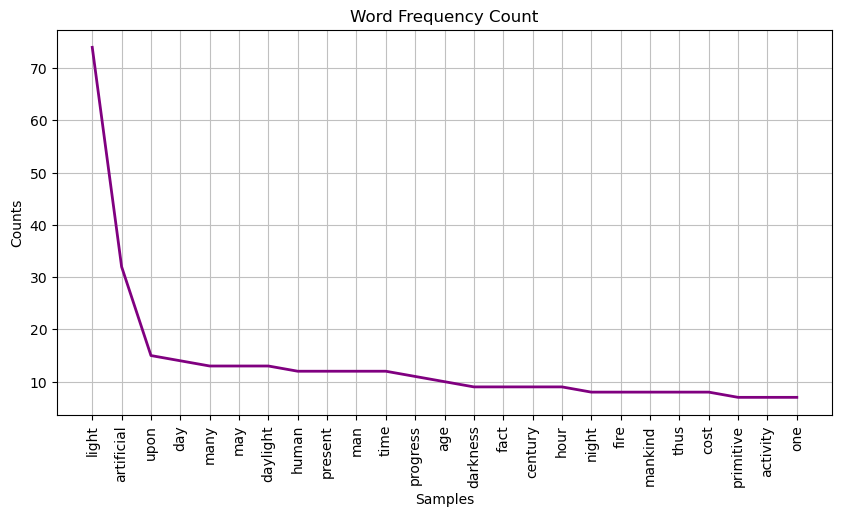

In [8]:
def get_lemmatized_words(word_list):
    """
    Takes a list of tokens, lemmatizes them, and returns the cleaned list.
    """
    lemmatizer = WordNetLemmatizer()
    
    # Simple lemmatization (Assumes Nouns)
    # To get 'better' -> 'good', you'd use lemmatizer.lemmatize(word, pos=wordnet.ADJ)
    lemmatized = [lemmatizer.lemmatize(word) for word in word_list]
    
    return lemmatized


# Lemmatize the words
words_lemmatized = get_lemmatized_words(words)

# Plot the results using your purple line function
plot_word_freq(words_lemmatized, 25)

In [9]:
# Sentiment analysis of first chapter
# Perform the analysis
blob = TextBlob(data["first_chapter"])
sentiment = blob.sentiment

# Define a helper for your specific style
def print_sentiment(label, value):
    """
    Displays a formatted sentiment label and score as styled HTML output.
    """
    display(HTML(f"<b><span style='color:#006400;'>{label}</span></b> {value:.4f}"))

# Print the results
print_sentiment("Polarity:", sentiment.polarity)         # -1 (Negative) to 1 (Positive)
print_sentiment("Subjectivity:", sentiment.subjectivity) # 0 (Fact) to 1 (Opinion)

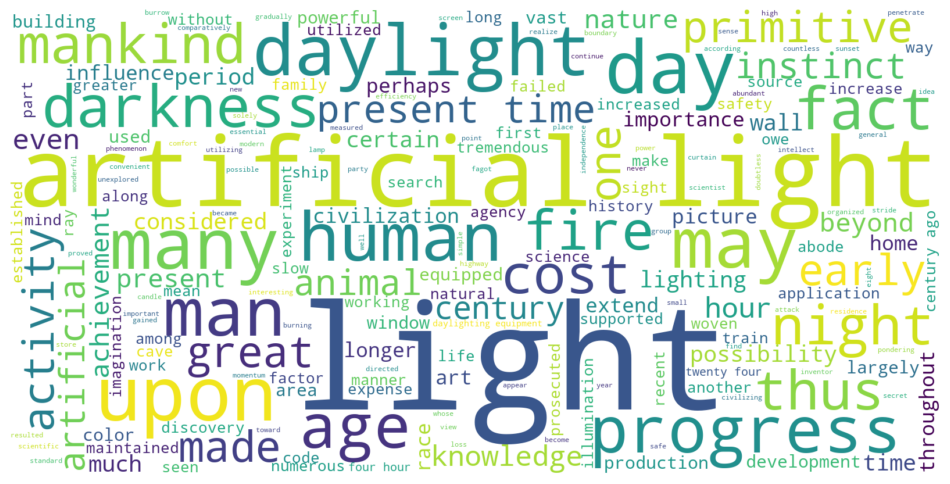

In [10]:
# Advanced Visualization: Word Cloud
# Setup the display text
display(HTML("<b><span style='color:#006400;'>Generating Word Cloud...</span></b>"))

# Create the figure size 
plt.figure(figsize=(12, 8))

# Generate the cloud
cloud = WordCloud(width=1600, height=800, background_color="white", colormap='viridis').generate(" ".join(words_lemmatized))

# Display the cloud
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off") 
plt.show()

## Future Enhancements
- Extend analysis to multiple chapters or full-text analysis
- Compare sentiment trends across chapters
- Enable batch analysis of multiple Project Gutenberg books
- Develop interactive dashboards using Streamlit or Dash
- Implement POS-aware lemmatization for improved linguistic accuracy
- Integrate Named Entity Recognition (NER) using spaCy